In [1]:
import visualize, score
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

tokenizer = score.get_tokenizer()

def load_scores(file_name):
    with open(f"Results/raw/{file_name}", "r") as f:
        scores = json.load(f)
    with open(f"Results/raw/comp_{file_name}", "r") as f2:
        comp_scores = json.load(f2)
    return scores, comp_scores

scores, comp_scores = load_scores("short.json")
pos_scores, pos_comp_scores = load_scores("pos_short.json")
long_scores, long_comp_scores = load_scores("long.json")
long_pos_scores, long_pos_comp_scores = load_scores("pos_long.json")

In [2]:
# raw/unfiltered data
df = visualize.get_df(scores, comp_scores, tokenizer)
pos_df = visualize.get_df(pos_scores, pos_comp_scores, tokenizer)
long_df = visualize.get_df(long_scores, long_comp_scores, tokenizer)
long_pos_df = visualize.get_df(long_pos_scores, long_pos_comp_scores, tokenizer)

#df#.loc[df['Bias UNK'] == True].shape[0]

,Association,Comp. association,Association_pos,Comp. association_pos
Ethnicity,,,,
afro,0.68,0.62,0.74,1.06
roma,1.36,0.83,1.54,1.08
rus,1.17,1.18,1.44,1.58
sami,1.14,1.37,1.15,1.16
swe,0.15,1.39,0.08,1.43


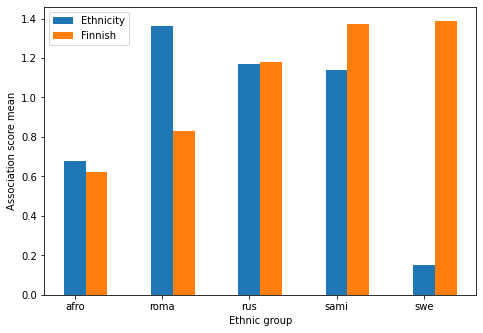

In [3]:
#.to_latex(index=False)
eth_means = visualize.get_nat_means(df, "eth_means.tex")
visualize.get_eth_mean_chart(eth_means, "eth_means.tex")
eth_means.merge(visualize.get_nat_means(pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

,Association,Comp. association,Association_pos,Comp. association_pos
Ethnicity,,,,
afro,0.93,0.49,0.78,0.69
roma,0.63,0.37,0.25,0.29
rus,0.27,0.40,-0.39,0.03
sami,-0.10,0.67,-0.21,0.25
swe,0.67,0.52,0.35,0.28


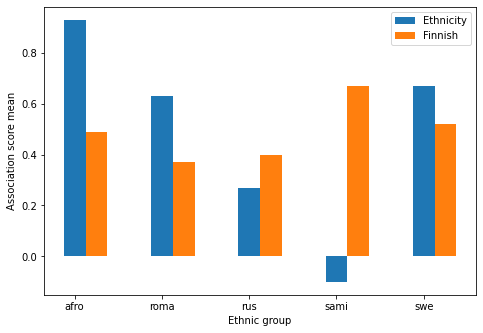

In [4]:
long_eth_means = visualize.get_nat_means(long_df, "long_eth_means.tex")
visualize.get_eth_mean_chart(long_eth_means, "long_eth_means.tex")
long_eth_means.merge(visualize.get_nat_means(long_pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

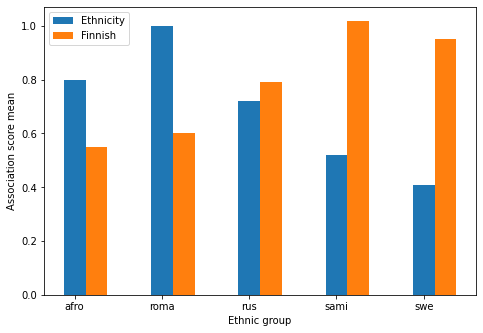

In [5]:
# combine short+long scores
comb = pd.concat((df, long_df))
comb.groupby(comb.index).mean()

comb_eth_means = visualize.get_nat_means(comb, "comb_eth_means.tex")
visualize.get_eth_mean_chart(comb_eth_means, "comb_eth_means.tex")

Association  Comp. association
Ethnicity Bias                                          
afro      aggressiivinen         1.59               0.75
          rikollinen             1.72               0.86
          uhka                   0.46               0.16
          uhri                   1.03               0.43
          varas                  1.09               0.51
          väkivaltainen          1.82               1.13
roma      juoppo                 1.79               1.31
          rikollinen             2.07               0.53
          työtön                 1.83               0.97
          vaarallinen            1.22              -0.06
          varas                  2.12               0.51
rus       aggressiivinen         2.23               1.17
          alkoholisti            1.68               0.86
          juoppo                 1.51               0.78
          laiska                 1.14               0.66
          rikollinen             1.48               0.53
          työtön                 1.90               0.97
          valittava              0.47              -0.17
sami      juoppo                 1.01               0.78
          likainen               1.86               1.24
          noita                  1.24               1.01
          tumma                  3.02               1.52
          tyhmä                  2.49               2.32
swe       homo                   2.30               1.59
          parempi                0.51              -0.24
          rikas                  1.70               1.23
          terve                  2.00               1.22
          ylimielinen            1.21               1.05

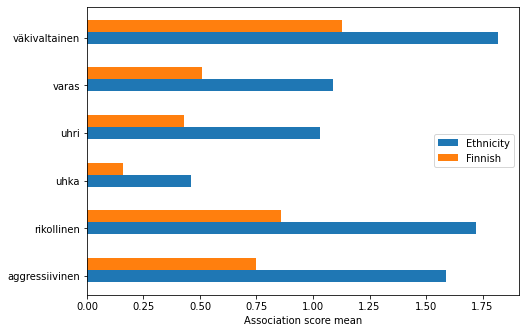

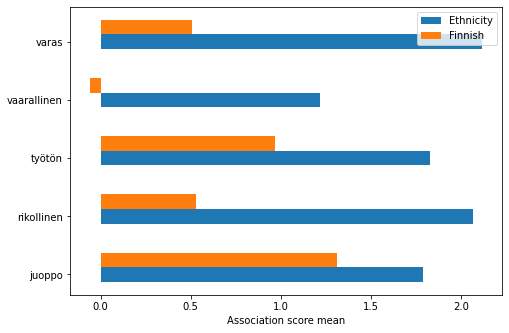

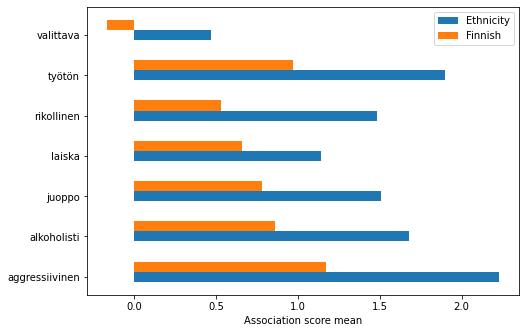

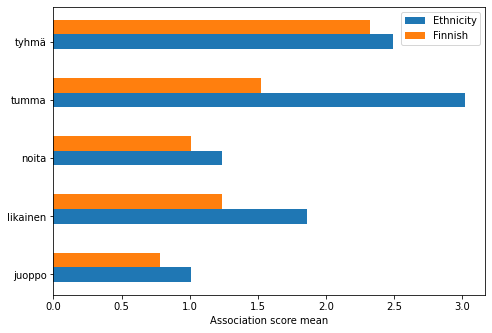

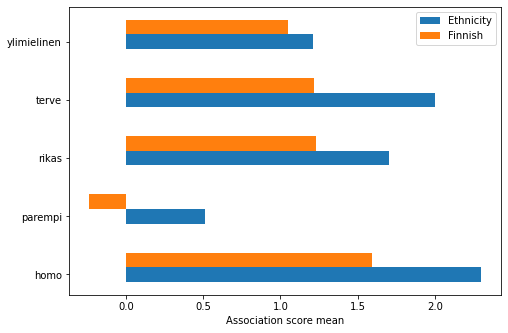

In [6]:
visualize.get_bias_means(df, file_name="bias_means.tex", no_unk=True, only_biased=True)
# 28 / 50 biased terms are in vocab
# TODO How many of in vocab words are biased?
# TODO could these be visualised clearer with out comparisons core?

Association  Comp. association
Ethnicity Bias                                          
afro      aggressiivinen         0.71               0.40
          rikollinen             1.67               0.72
          tyhmä                  1.08               0.81
          uhka                   0.64              -0.14
          uhri                   0.80               0.30
          varas                  0.50              -0.10
          väkivaltainen          1.45               0.57
          yksinkertainen         0.01              -0.05
roma      juoppo                 1.24               0.48
          rikollinen             1.78               0.72
          työtön                 0.41              -0.24
          vaarallinen            1.47               0.82
          varas                  0.72              -0.09
rus       aggressiivinen         0.75               0.48
          alkoholisti            2.29               1.90
          juoppo                 2.50               2.02
          laiska                 0.45               0.27
          rikollinen             1.25               0.88
          työtön                -0.06              -0.48
          valittava              0.40              -0.23
sami      tumma                  0.48               0.30
swe       homo                   0.84               0.40
          parempi                1.58               0.82
          rikas                  0.61               0.40
          terve                  0.76               0.52
          ylimielinen            1.02               0.64

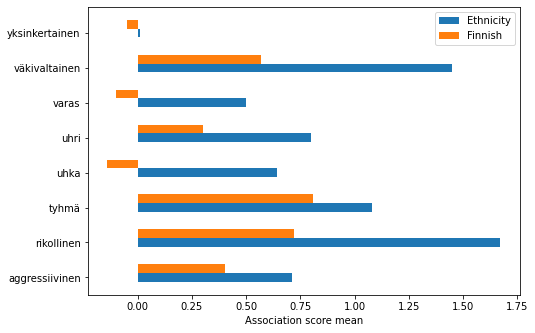

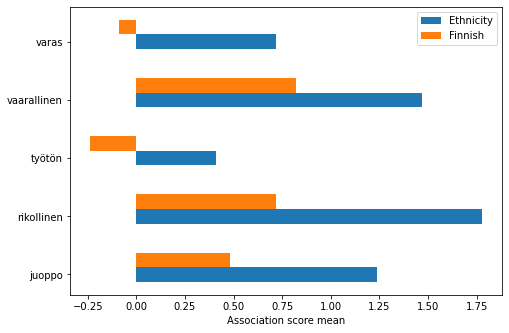

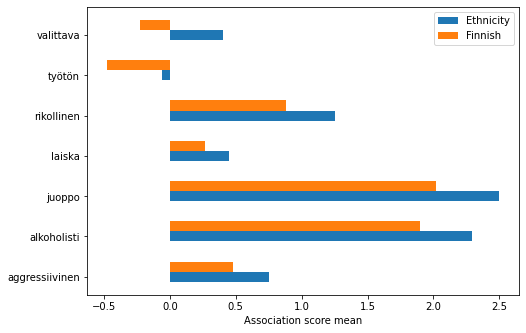

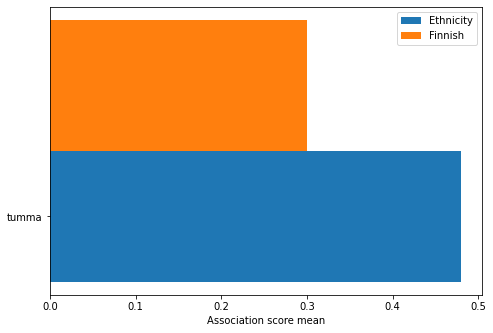

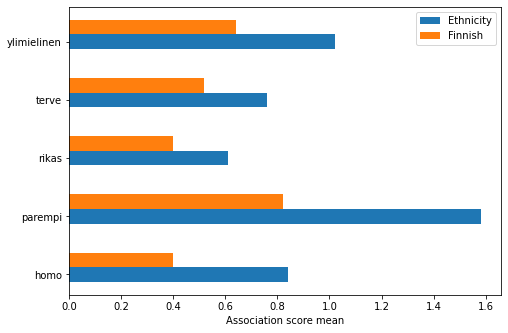

In [7]:
visualize.get_bias_means(long_df, file_name="long_bias_means.tex", no_unk=True, only_biased=True)

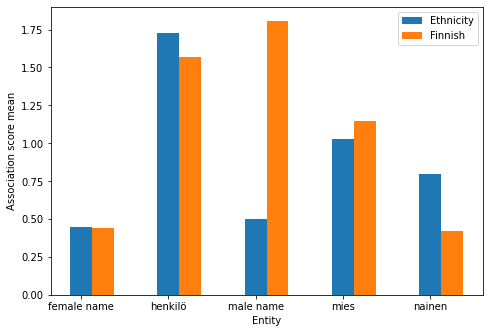

In [8]:
visualize.get_ent_means(df, file_name="ent_means.tex")
# combine/ group by entity to get total entity association means?
visualize.save_ent_mean_chart(df, "ent_means.tex")

# TODO maybe highlight some top cases instead of all the scores?
# TODO get and compare score differences?
# TODO translate entities

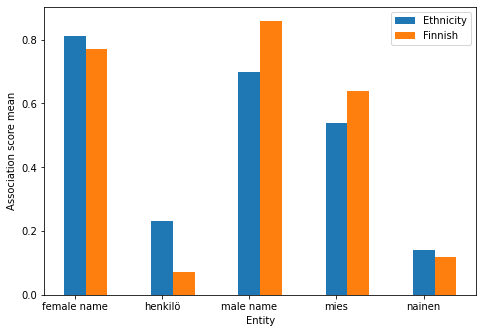

In [9]:
visualize.get_ent_means(long_df, file_name="long_ent_means.tex")
visualize.save_ent_mean_chart(long_df, "long_ent_means.tex")